In [ ]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import zipfile
import cv2
import shutil

In [ ]:
from IPython.display import Image

In [ ]:


zip_path = "/content/drive/MyDrive/Collapse Detector.v2i.yolov11.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import os

print("Isi folder dataset:", os.listdir("/content/dataset"))
print("Isi folder train:", os.listdir("/content/dataset/train"))
print("Isi folder test:", os.listdir("/content/dataset/test"))
print("Isi folder valid:", os.listdir("/content/dataset/valid"))


Isi folder dataset: ['README.dataset.txt', 'data.yaml', 'README.roboflow.txt', 'train', 'test', 'valid']
Isi folder train: ['labels', 'images']
Isi folder test: ['labels', 'images']
Isi folder valid: ['labels', 'images']


In [ ]:
%cat /content/dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['Global Collapse', 'Non-Collapse', 'Partial Collapse']

roboflow:
  workspace: metehan-kandemir
  project: collapse-detector
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/metehan-kandemir/collapse-detector/dataset/2

In [ ]:
from glob import glob

train_images = glob("/content/dataset/train/images/*.jpg")
valid_images = glob("/content/dataset/valid/images/*.jpg")
test_images = glob("/content/dataset/test/images/*.jpg")

print(f"Train: {len(train_images)}")
print(f"Valid: {len(valid_images)}")
print(f"Test : {len(test_images)}")


Train: 9624
Valid: 289
Test : 119


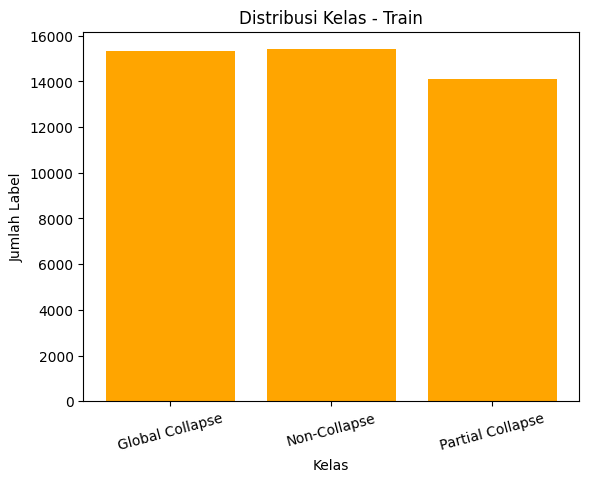

In [ ]:
from collections import Counter


def count_classes(label_paths):
    counts = []
    for path in label_paths:
        with open(path, 'r') as f:
            for line in f:
                cls_id = int(line.strip().split()[0])
                counts.append(cls_id)
    return Counter(counts)

label_paths = glob("/content/dataset/train/labels/*.txt")
counts = count_classes(label_paths)

id2label = {0: "Global Collapse", 1: "Non-Collapse", 2: "Partial Collapse"}
counts_named = {id2label[k]: v for k, v in counts.items()}

plt.bar(counts_named.keys(), counts_named.values(), color='orange')
plt.title("Distribusi Kelas - Train")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Label")
plt.xticks(rotation=15)
plt.show()


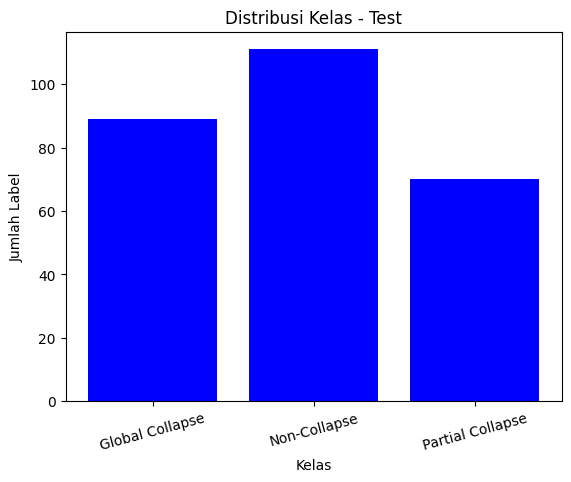

In [ ]:
from collections import Counter


def count_classes(label_paths):
    counts = []
    for path in label_paths:
        with open(path, 'r') as f:
            for line in f:
                cls_id = int(line.strip().split()[0])
                counts.append(cls_id)
    return Counter(counts)

label_paths = glob("/content/dataset/test/labels/*.txt")
counts = count_classes(label_paths)

id2label = {0: "Global Collapse", 1: "Non-Collapse", 2: "Partial Collapse"}
counts_named = {id2label[k]: v for k, v in counts.items()}

plt.bar(counts_named.keys(), counts_named.values(), color='blue')
plt.title("Distribusi Kelas - Test")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Label")
plt.xticks(rotation=15)
plt.show()


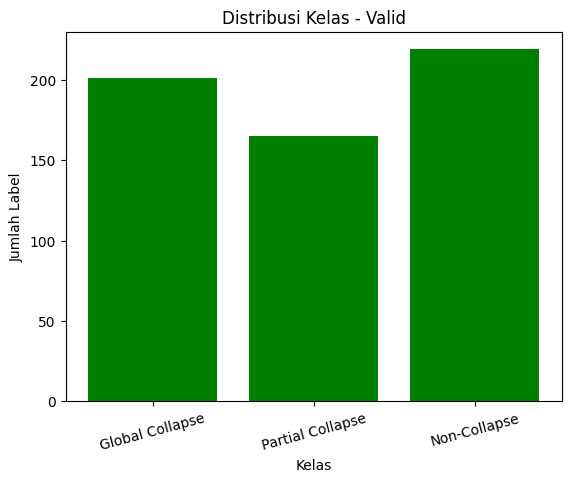

In [ ]:
from collections import Counter


def count_classes(label_paths):
    counts = []
    for path in label_paths:
        with open(path, 'r') as f:
            for line in f:
                cls_id = int(line.strip().split()[0])
                counts.append(cls_id)
    return Counter(counts)

label_paths = glob("/content/dataset/valid/labels/*.txt")
counts = count_classes(label_paths)

id2label = {0: "Global Collapse", 1: "Non-Collapse", 2: "Partial Collapse"}
counts_named = {id2label[k]: v for k, v in counts.items()}

plt.bar(counts_named.keys(), counts_named.values(), color='green')
plt.title("Distribusi Kelas - Valid")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Label")
plt.xticks(rotation=15)
plt.show()


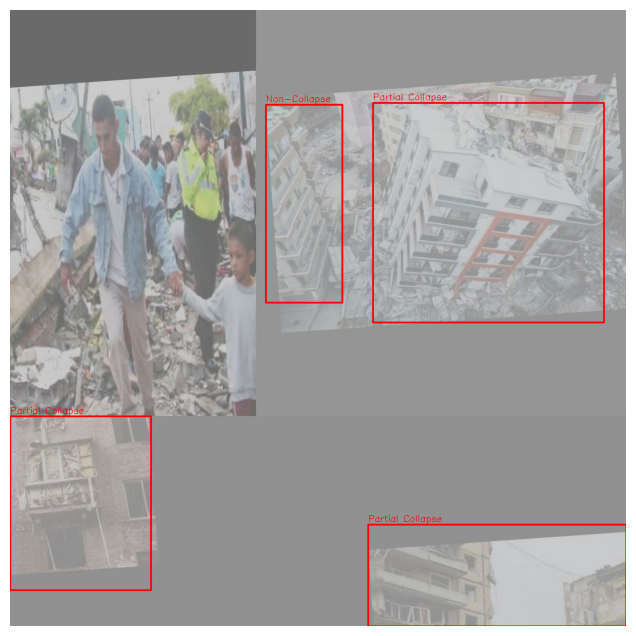

In [ ]:
def show_image_with_labels(image_path, label_path, class_names):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            cls_id, cx, cy, bw, bh = map(float, parts)
            xmin = int((cx - bw / 2) * w)
            ymin = int((cy - bh / 2) * h)
            xmax = int((cx + bw / 2) * w)
            ymax = int((cy + bh / 2) * h)

            cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
            cv2.putText(img, class_names[int(cls_id)], (xmin, ymin - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

sample_img = train_images[0]
sample_label = sample_img.replace("images", "labels").replace(".jpg", ".txt")
class_names = ["Global Collapse", "Non-Collapse", "Partial Collapse"]

show_image_with_labels(sample_img, sample_label, class_names)

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # Ganti dengan 'yolov8n' jika v11 error

model.train(
    data="/content/dataset/data.yaml",
    epochs=30,              # Jumlah epoch
    imgsz=640,              # Ukuran input gambar
    batch=16,               # Ukuran batch
    lr0=0.01,               # Learning rate awal
    lrf=0.01,               # Learning rate akhir
    optimizer="SGD",        # Bisa "SGD" atau "Adam"
    weight_decay=0.0005,    # Regularisasi
    momentum=0.937,         # Untuk optimizer SGD
    warmup_epochs=3,        # Epoch awal stabilisasi
    patience=10,            # Early stopping
    verbose=True
)


100%|██████████| 5.35M/5.35M [00:00<00:00, 165MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

100%|██████████| 755k/755k [00:00<00:00, 33.6MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

 23        [16, 19, 22]  1    431257  ultralytics.nn.modules.head.Detect           [3, [64, 128, 256]]           
YOLO11n summary: 181 layers, 2,590,425 parameters, 2,590,409 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1487.2±575.2 MB/s, size: 69.9 KB)


train: Scanning /content/dataset/train/labels... 9624 images, 320 backgrounds, 0 corrupt: 100%|██████████| 9624/9624 [00:04<00:00, 2315.11it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 404.9±141.6 MB/s, size: 60.5 KB)


val: Scanning /content/dataset/valid/labels... 289 images, 25 backgrounds, 0 corrupt: 100%|██████████| 289/289 [00:00<00:00, 662.89it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.49G      1.448      2.667      1.526         50        640: 100%|██████████| 602/602 [03:47<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        289        585      0.313      0.409      0.304      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.77G      1.434      2.132      1.507         62        640: 100%|██████████| 602/602 [03:39<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]


                   all        289        585      0.323      0.423      0.299       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.79G      1.475      2.093      1.534         42        640: 100%|██████████| 602/602 [03:32<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

                   all        289        585      0.383      0.407      0.311      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.79G      1.504      2.099      1.559         60        640: 100%|██████████| 602/602 [03:29<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]

                   all        289        585      0.414      0.429      0.375       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.81G       1.46      2.023      1.535         71        640: 100%|██████████| 602/602 [03:37<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.15it/s]


                   all        289        585      0.343       0.37      0.281      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.81G      1.428      1.948      1.507         71        640: 100%|██████████| 602/602 [03:35<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]

                   all        289        585      0.491      0.372      0.394      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.83G      1.401        1.9       1.49         92        640: 100%|██████████| 602/602 [03:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]

                   all        289        585      0.411      0.526      0.436      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.84G      1.384      1.845      1.471         77        640: 100%|██████████| 602/602 [03:36<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]


                   all        289        585        0.5      0.518      0.473      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.85G      1.359      1.796      1.454         93        640: 100%|██████████| 602/602 [03:39<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.06it/s]

                   all        289        585      0.464      0.494      0.479      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.85G      1.339      1.758      1.445         44        640: 100%|██████████| 602/602 [03:31<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        289        585      0.538      0.547      0.518      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.87G      1.327       1.74      1.431         64        640: 100%|██████████| 602/602 [03:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.63it/s]


                   all        289        585      0.536      0.609      0.579      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.87G      1.317      1.704       1.42         58        640: 100%|██████████| 602/602 [03:27<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        289        585      0.602      0.539      0.566      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.89G      1.302      1.675       1.41         68        640: 100%|██████████| 602/602 [03:25<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]


                   all        289        585      0.582      0.608      0.606      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.89G      1.293      1.649      1.401         40        640: 100%|██████████| 602/602 [03:23<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


                   all        289        585      0.584      0.604      0.588      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.91G      1.278      1.622      1.392         49        640: 100%|██████████| 602/602 [03:26<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.79it/s]


                   all        289        585      0.612      0.596      0.601      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.91G      1.267      1.598      1.383         57        640: 100%|██████████| 602/602 [03:32<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]

                   all        289        585      0.592      0.589      0.625       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.93G      1.259      1.572      1.381         90        640: 100%|██████████| 602/602 [03:29<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.03it/s]

                   all        289        585      0.586       0.63      0.635      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.93G      1.242      1.556      1.369         56        640: 100%|██████████| 602/602 [03:26<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]

                   all        289        585      0.665      0.612      0.658      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.95G      1.242      1.533      1.359         46        640: 100%|██████████| 602/602 [03:21<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]

                   all        289        585      0.612       0.63      0.653      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.95G      1.231       1.52      1.358         64        640: 100%|██████████| 602/602 [03:32<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        289        585      0.639      0.627      0.668      0.381


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.97G      1.264      1.456      1.398         50        640: 100%|██████████| 602/602 [03:28<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.13it/s]

                   all        289        585      0.677      0.641      0.688      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.97G      1.242      1.415      1.386         35        640: 100%|██████████| 602/602 [03:24<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]

                   all        289        585      0.698      0.634      0.687        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.99G      1.229      1.383      1.372         59        640: 100%|██████████| 602/602 [03:21<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]

                   all        289        585      0.706      0.601      0.691      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.99G      1.218       1.36      1.364         22        640: 100%|██████████| 602/602 [03:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.22it/s]

                   all        289        585      0.702      0.638      0.702       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.01G      1.205      1.331      1.358         29        640: 100%|██████████| 602/602 [03:23<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        289        585      0.697      0.644       0.72      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.01G      1.192        1.3      1.347         29        640: 100%|██████████| 602/602 [03:20<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.34it/s]

                   all        289        585      0.701      0.678      0.729       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.03G      1.177      1.269      1.338         23        640: 100%|██████████| 602/602 [03:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        289        585      0.687      0.696      0.737      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.03G      1.162      1.251      1.327         24        640: 100%|██████████| 602/602 [03:22<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.08it/s]

                   all        289        585      0.744      0.668      0.738       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.05G      1.156      1.224      1.323         36        640: 100%|██████████| 602/602 [03:21<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.94it/s]

                   all        289        585      0.724        0.7      0.747       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.05G      1.137      1.198      1.309         41        640: 100%|██████████| 602/602 [03:20<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]

                   all        289        585      0.734       0.71      0.752      0.448



30 epochs completed in 1.779 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


                   all        289        585      0.733      0.704      0.751      0.447
       Global Collapse        119        201       0.72      0.632      0.667      0.325
          Non-Collapse         98        219      0.678      0.753      0.764      0.457
      Partial Collapse        143        165      0.801      0.727      0.822       0.56
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e693bf438d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:

# Buat direktori simpan di Google Drive
drive_output_dir = "/content/drive/MyDrive/CollapseDetectorModel/"
os.makedirs(drive_output_dir, exist_ok=True)

# Salin model terbaik
shutil.copy("/content/runs/detect/train/weights/best.pt", drive_output_dir)

# (Opsional) Salin file lainnya juga
shutil.copy("/content/runs/detect/train/results.png", drive_output_dir)


'/content/drive/MyDrive/CollapseDetectorModel/results.png'

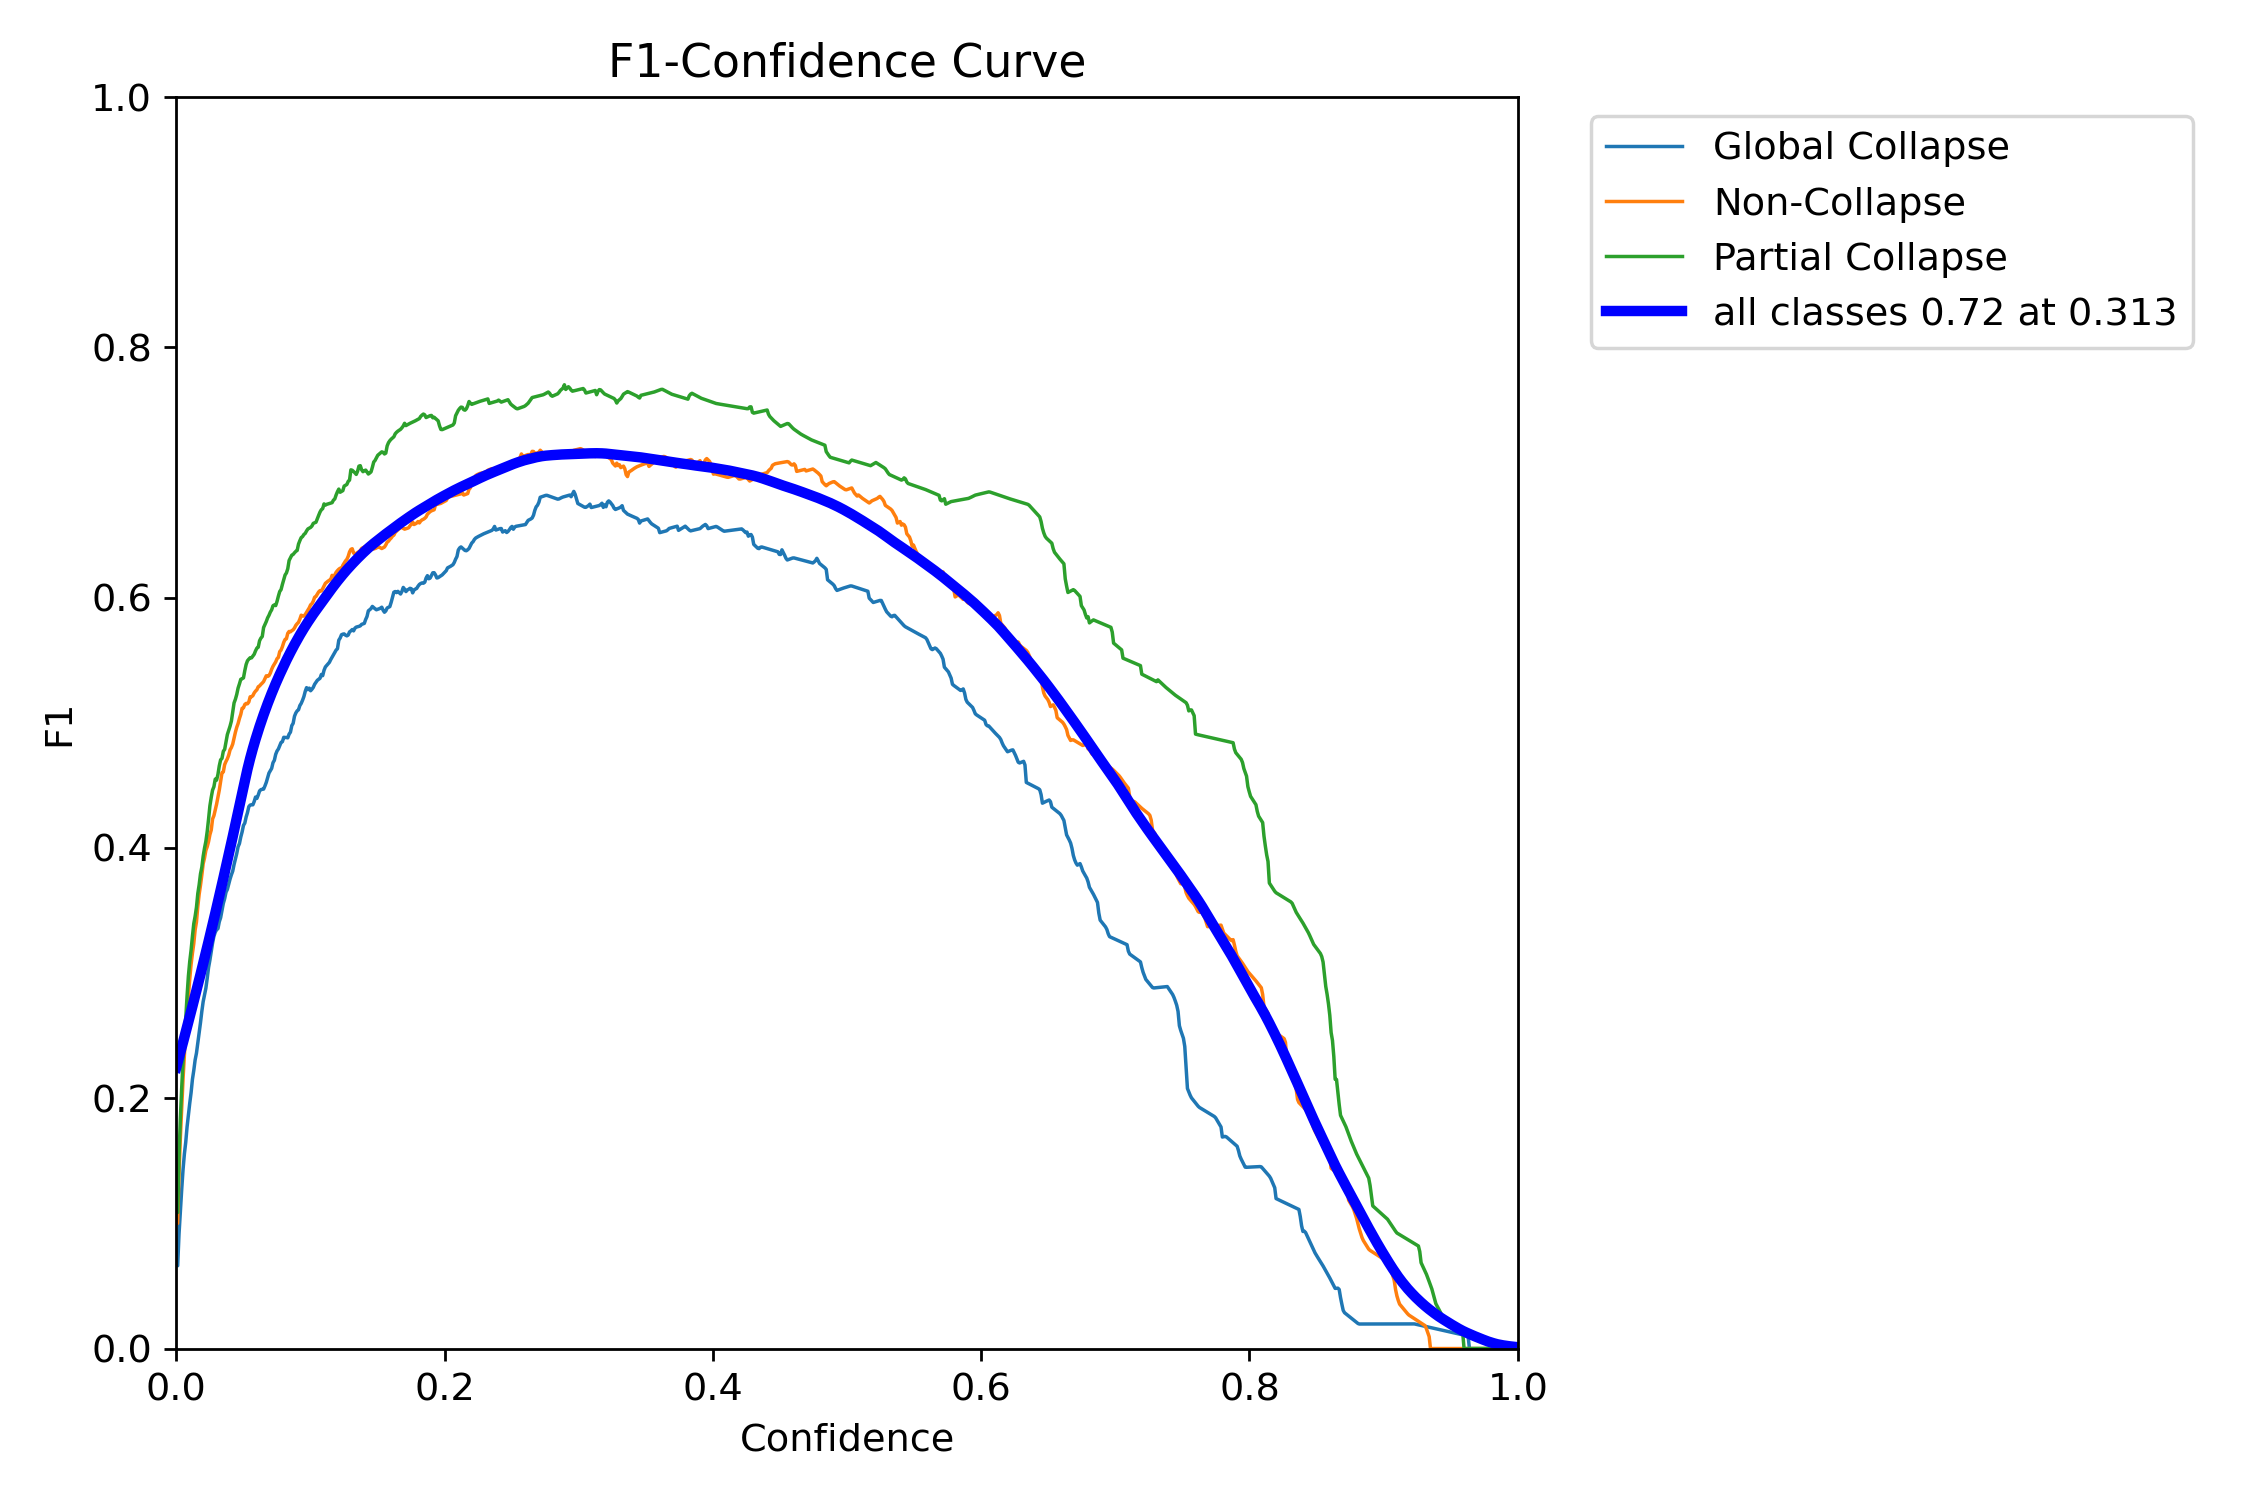

In [ ]:
Image(filename="/content/runs/detect/train/F1_curve.png", width=600)

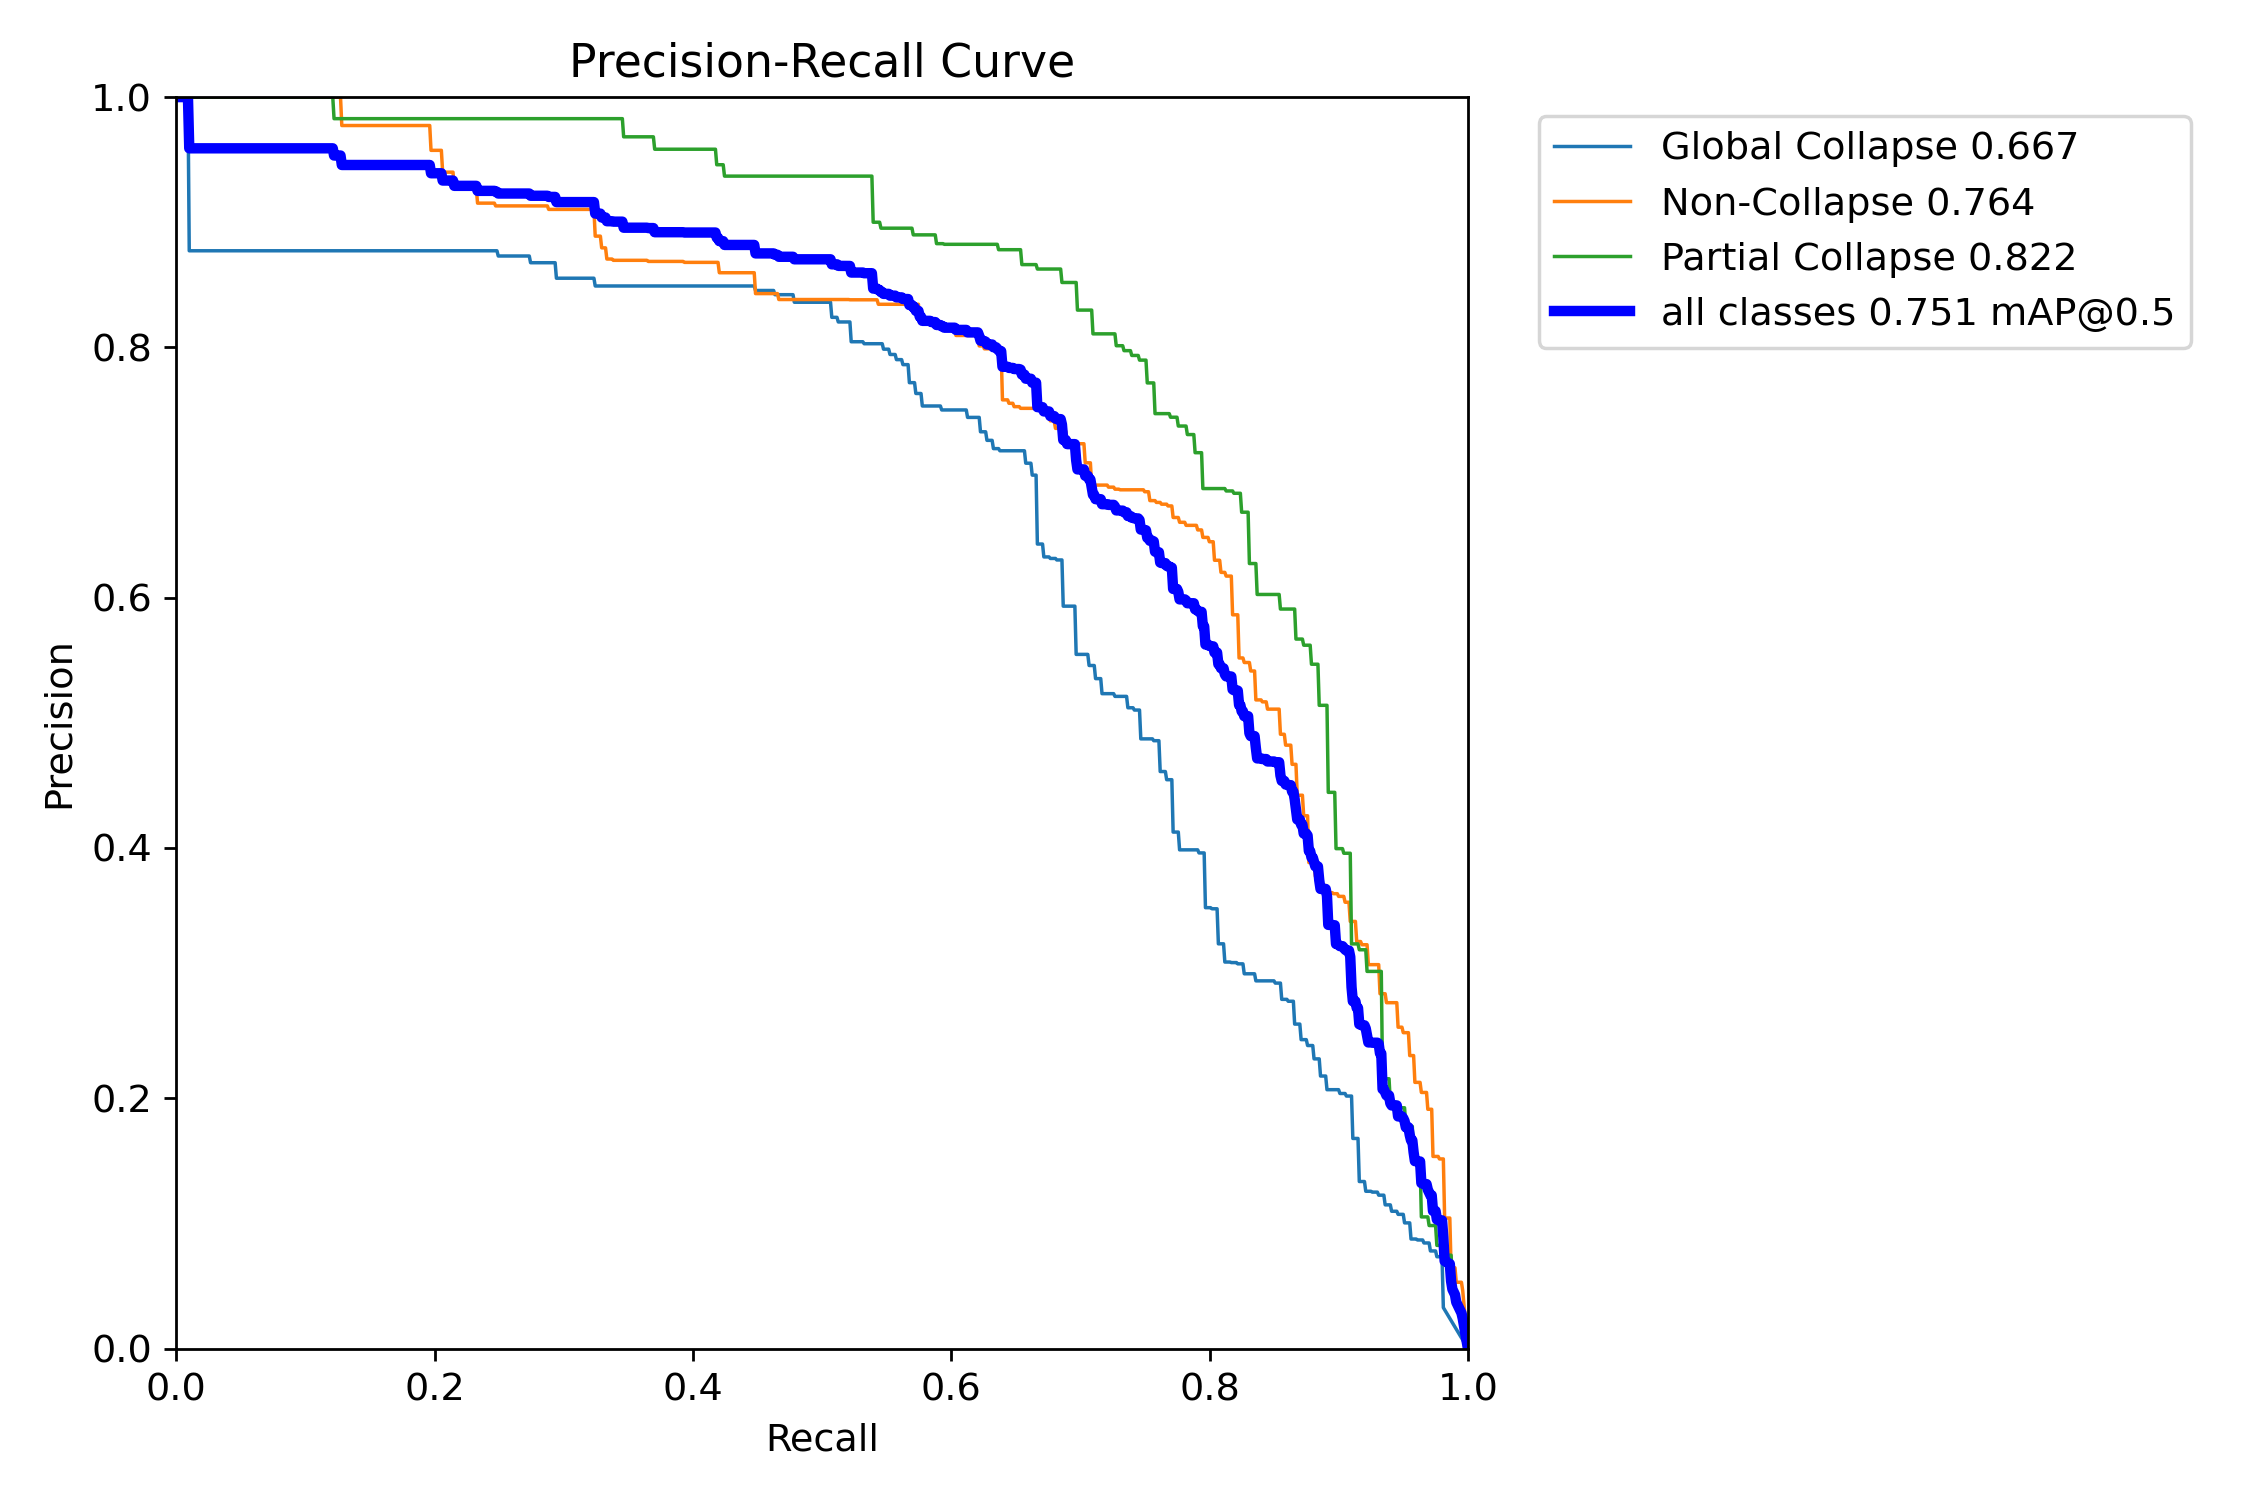

In [ ]:
Image(filename="/content/runs/detect/train/PR_curve.png", width=600)

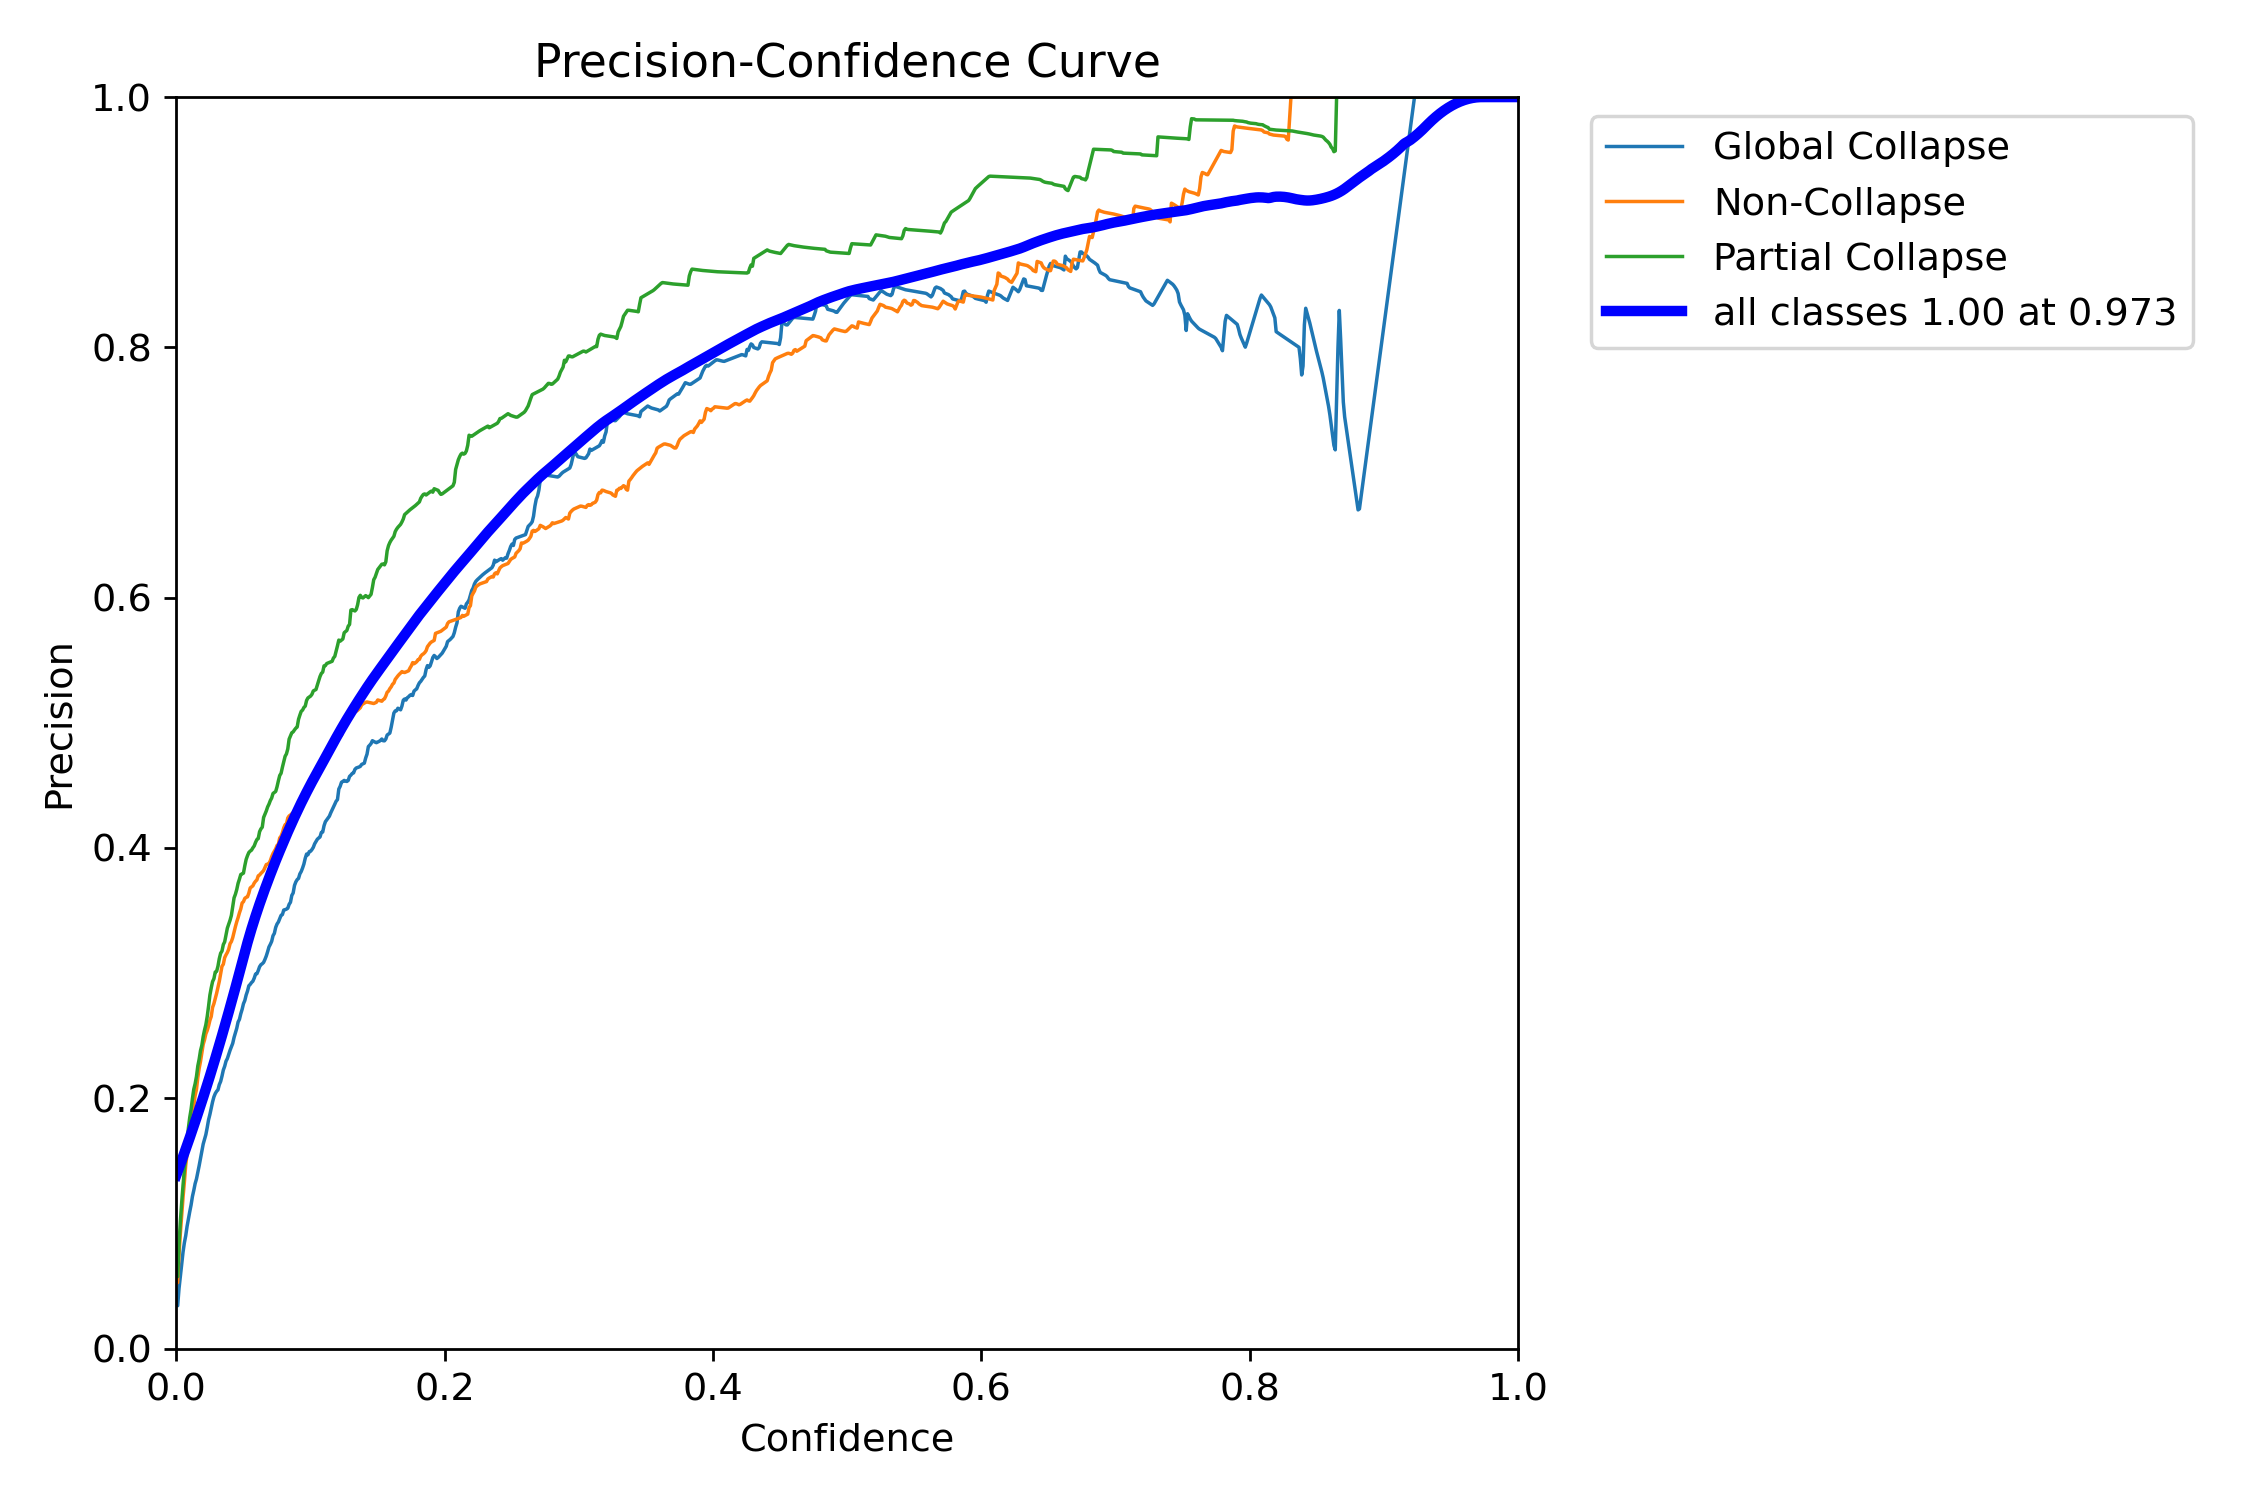

In [ ]:
Image(filename="/content/runs/detect/train/P_curve.png", width=600)

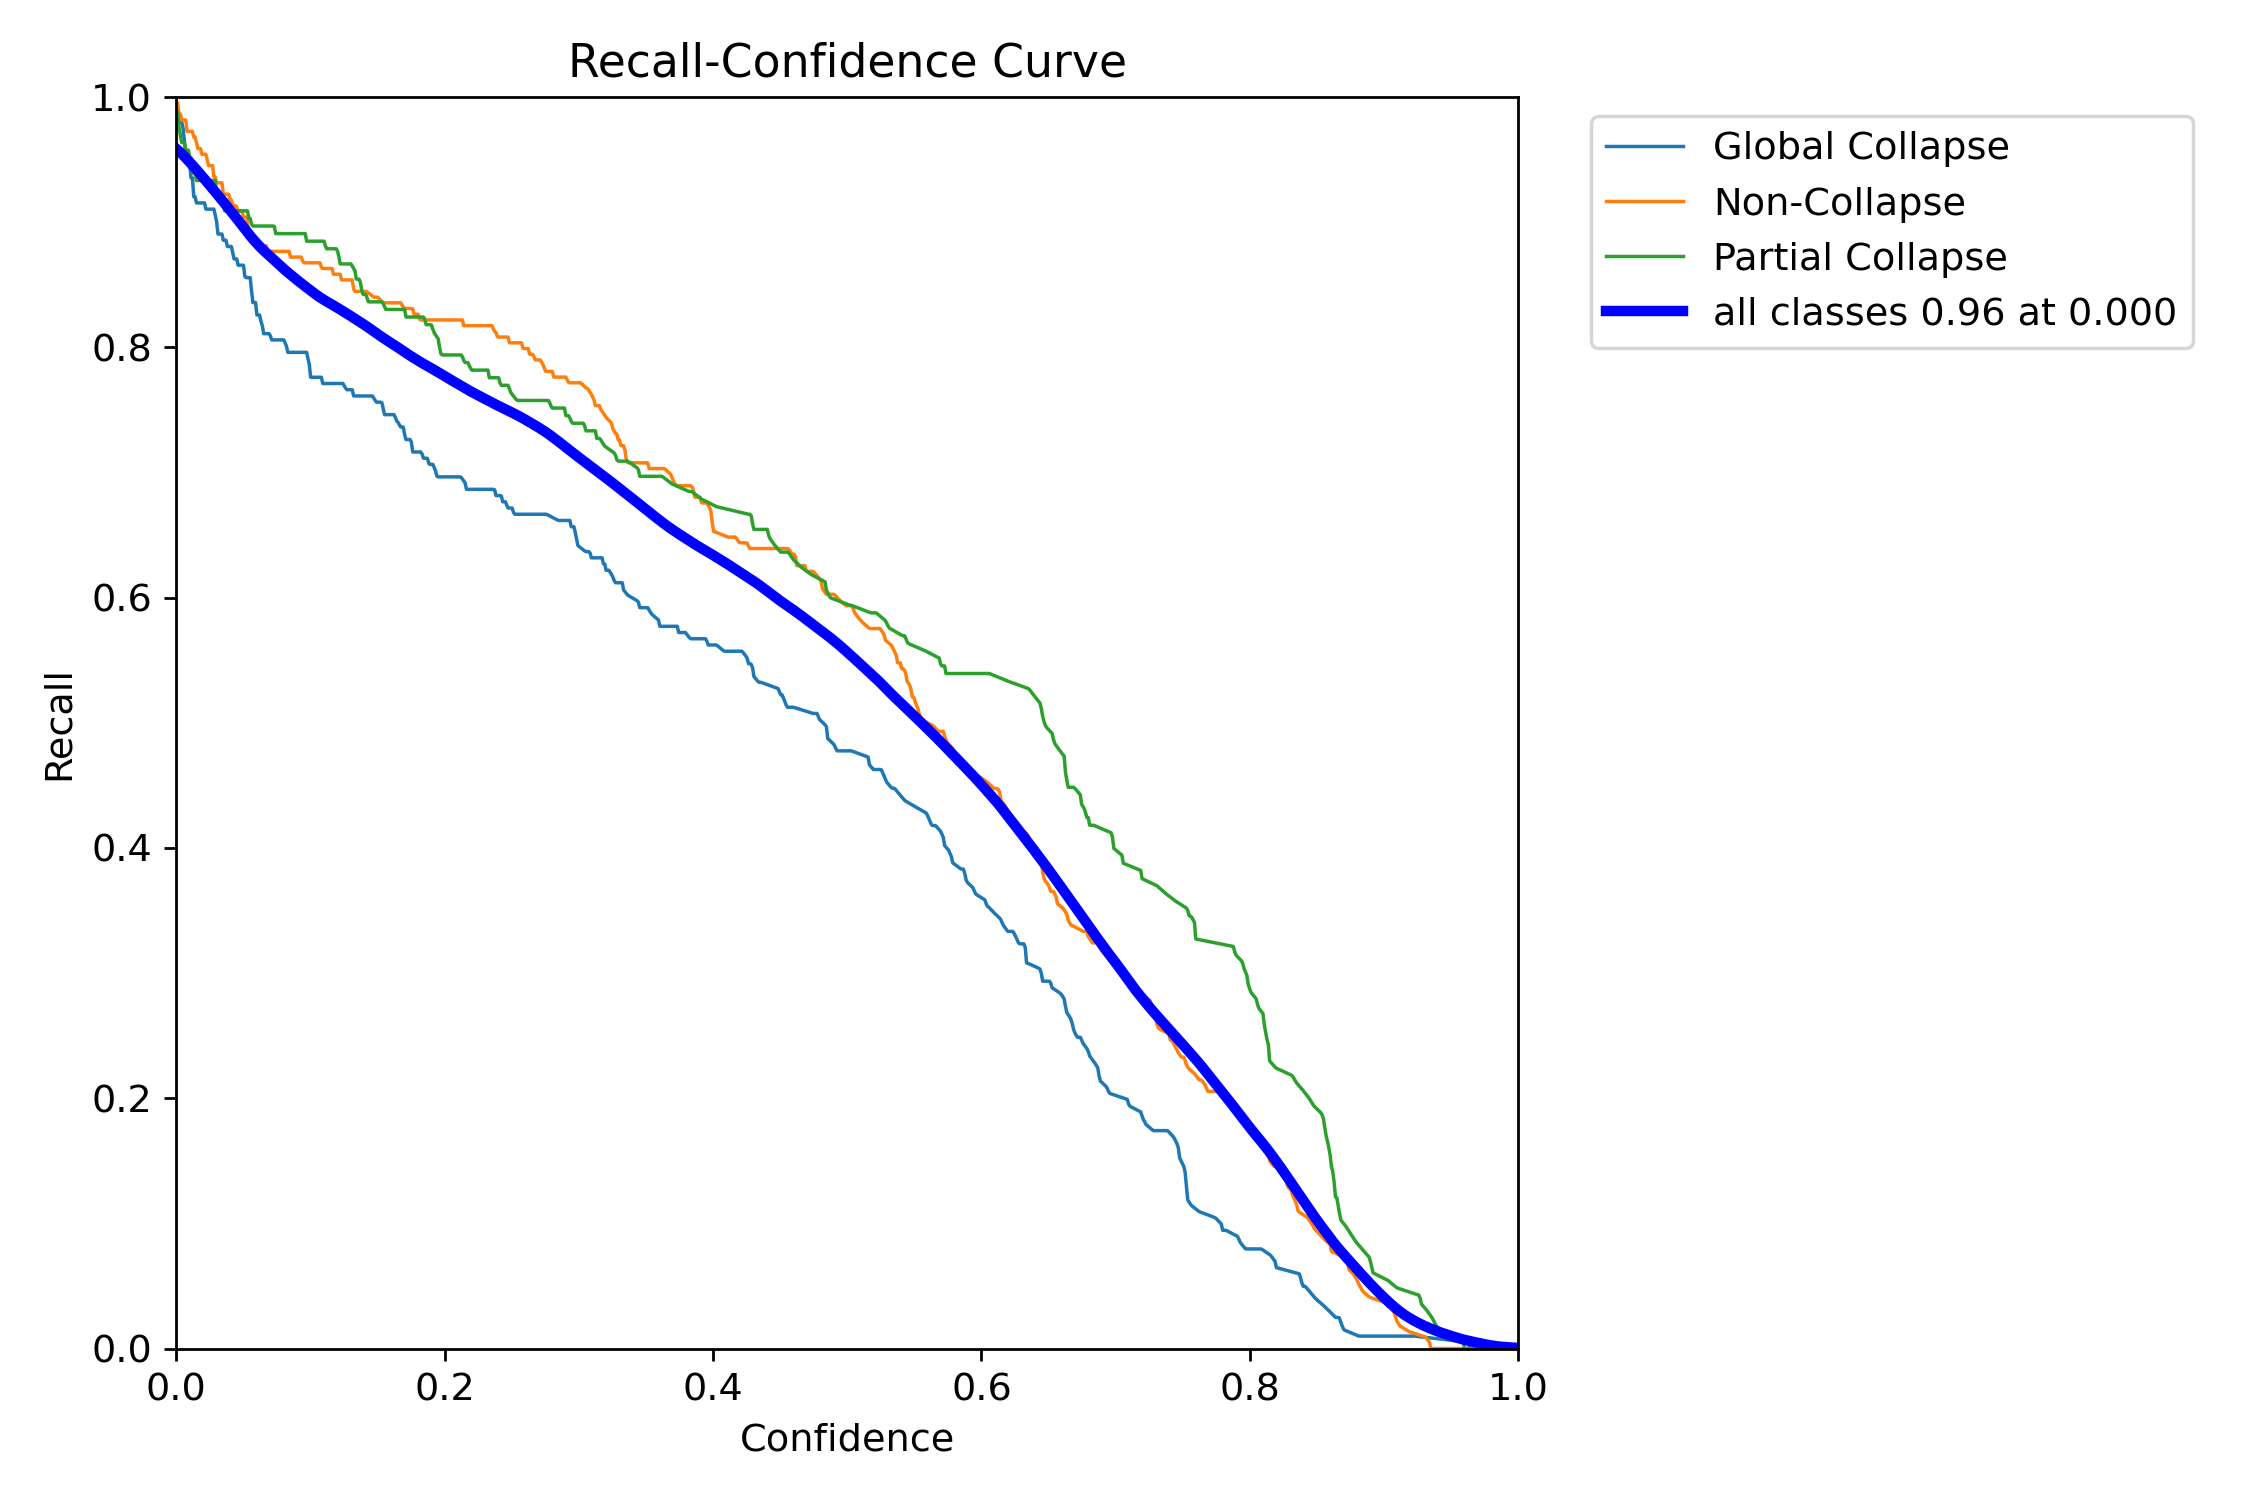

In [ ]:
Image(filename="/content/runs/detect/train/R_curve.png", width=600)

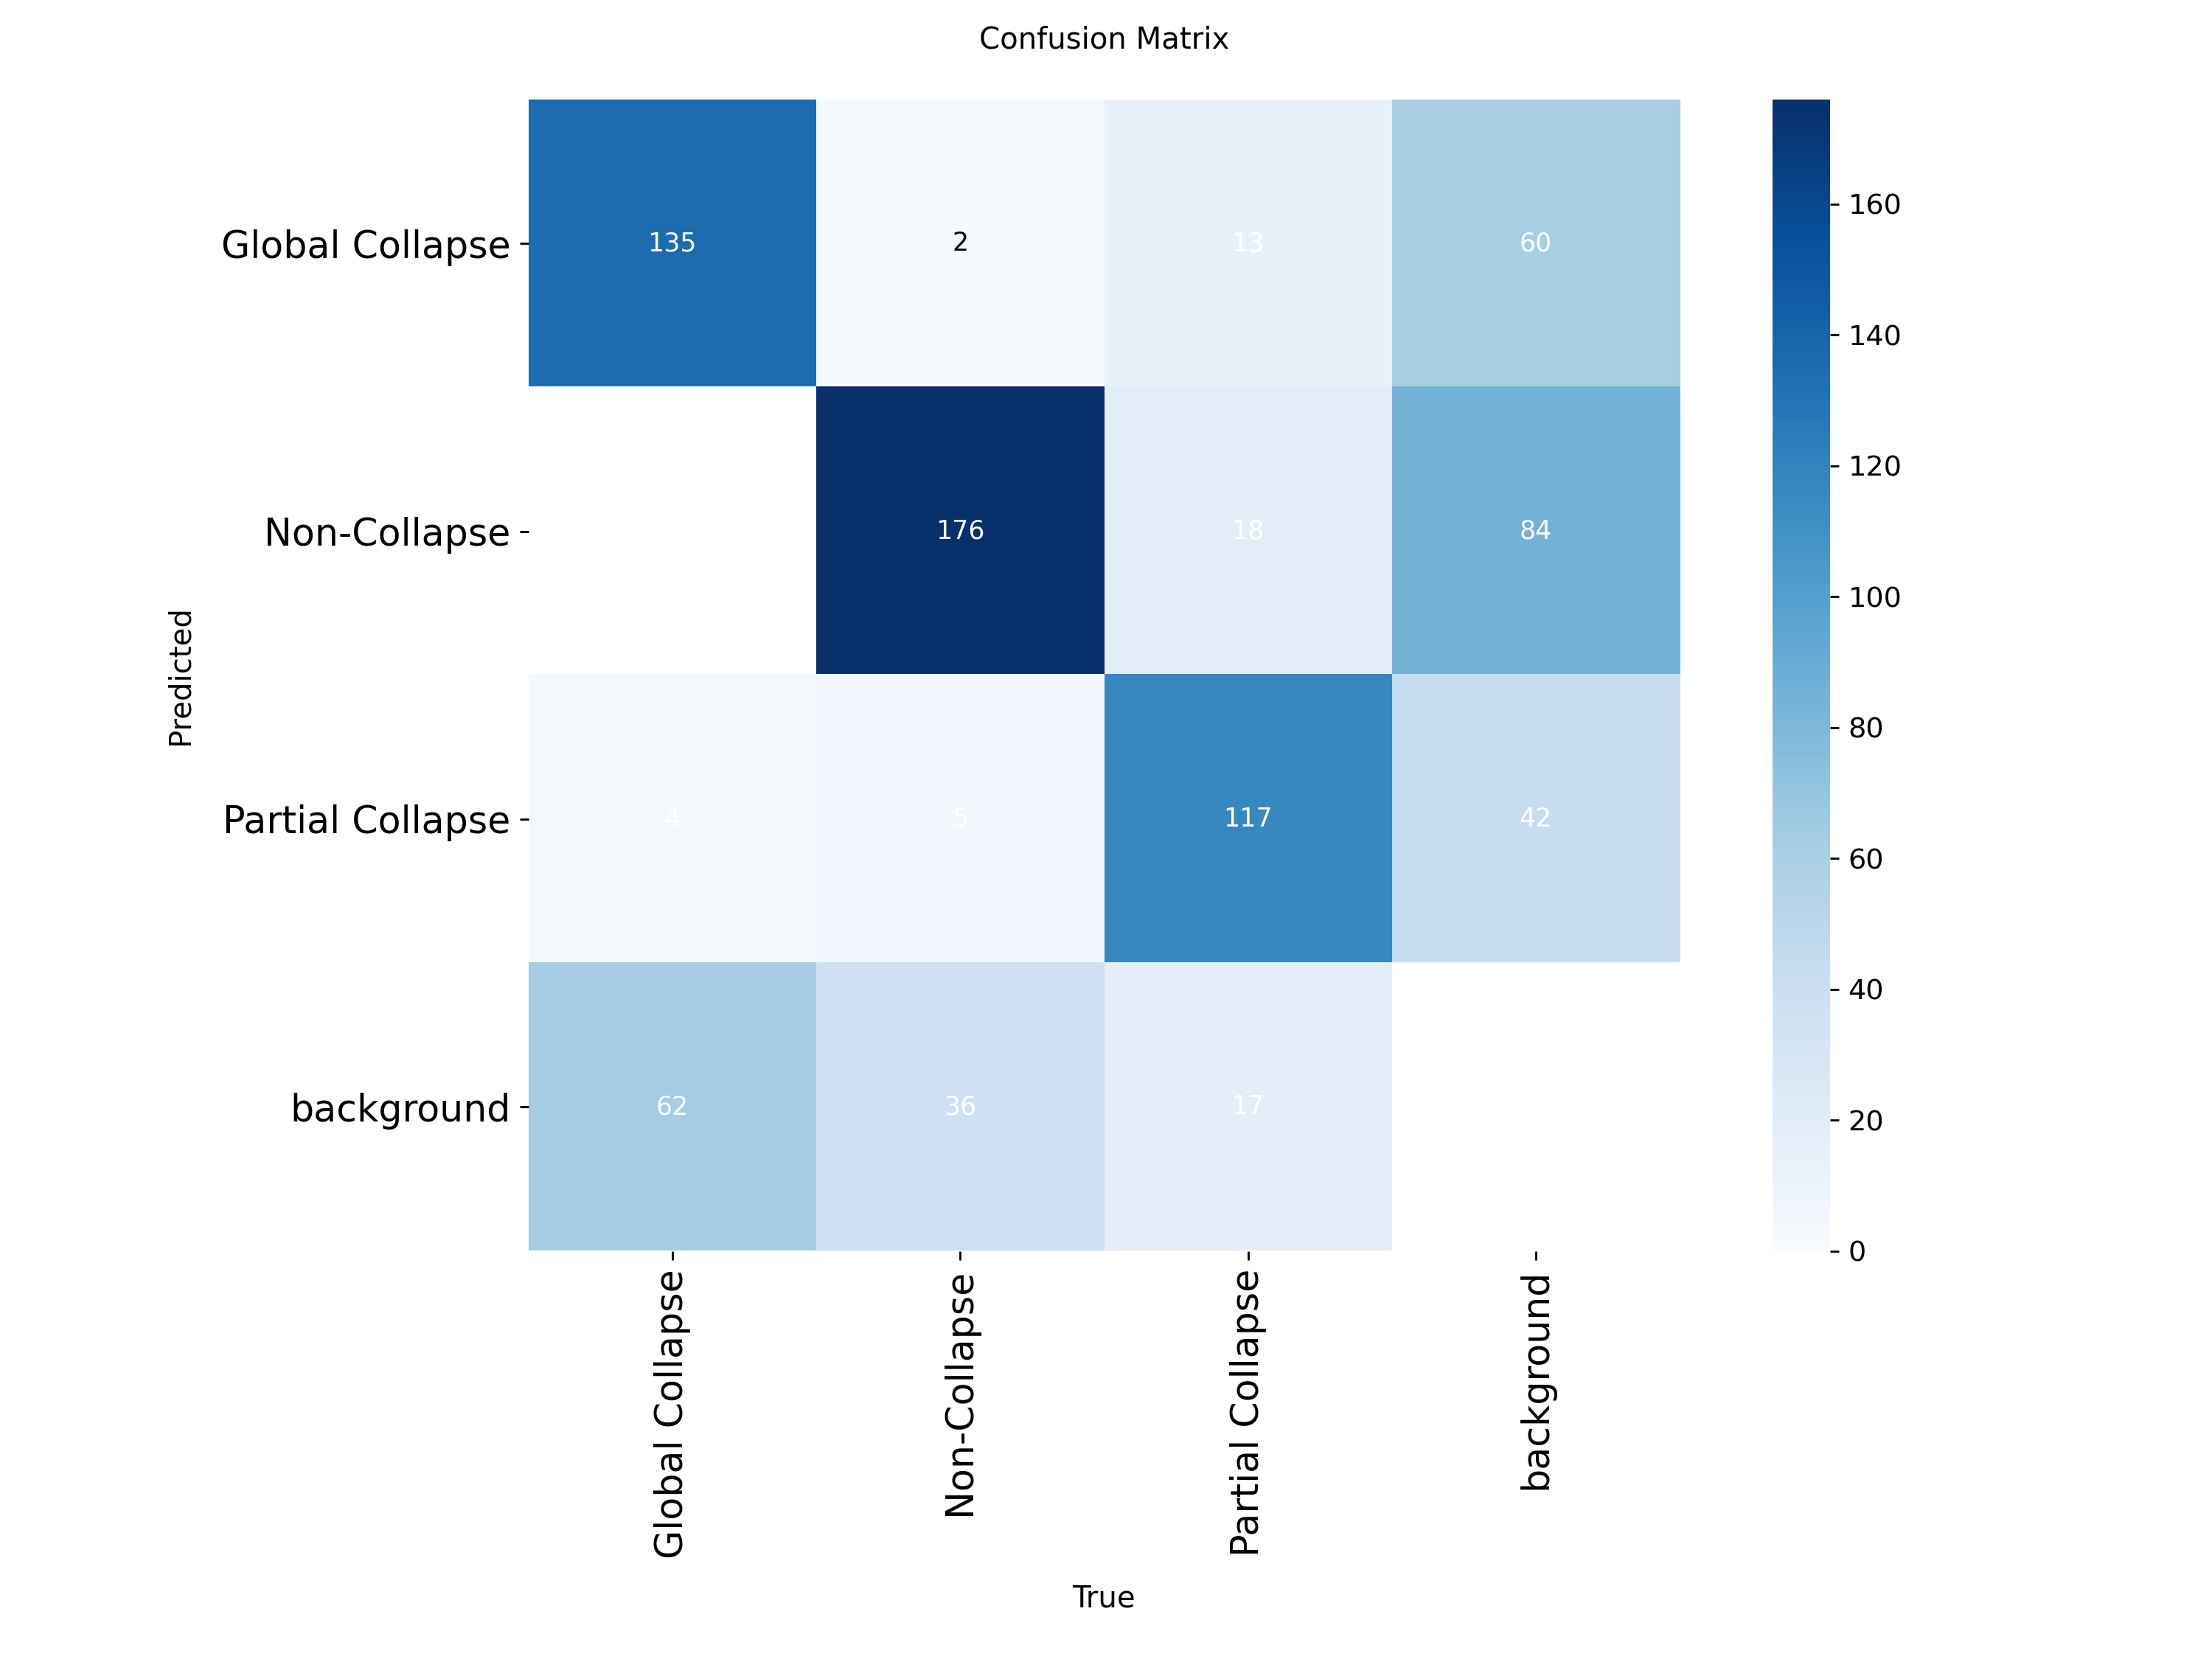

In [ ]:
Image(filename="/content/runs/detect/train/confusion_matrix.png", width=600)

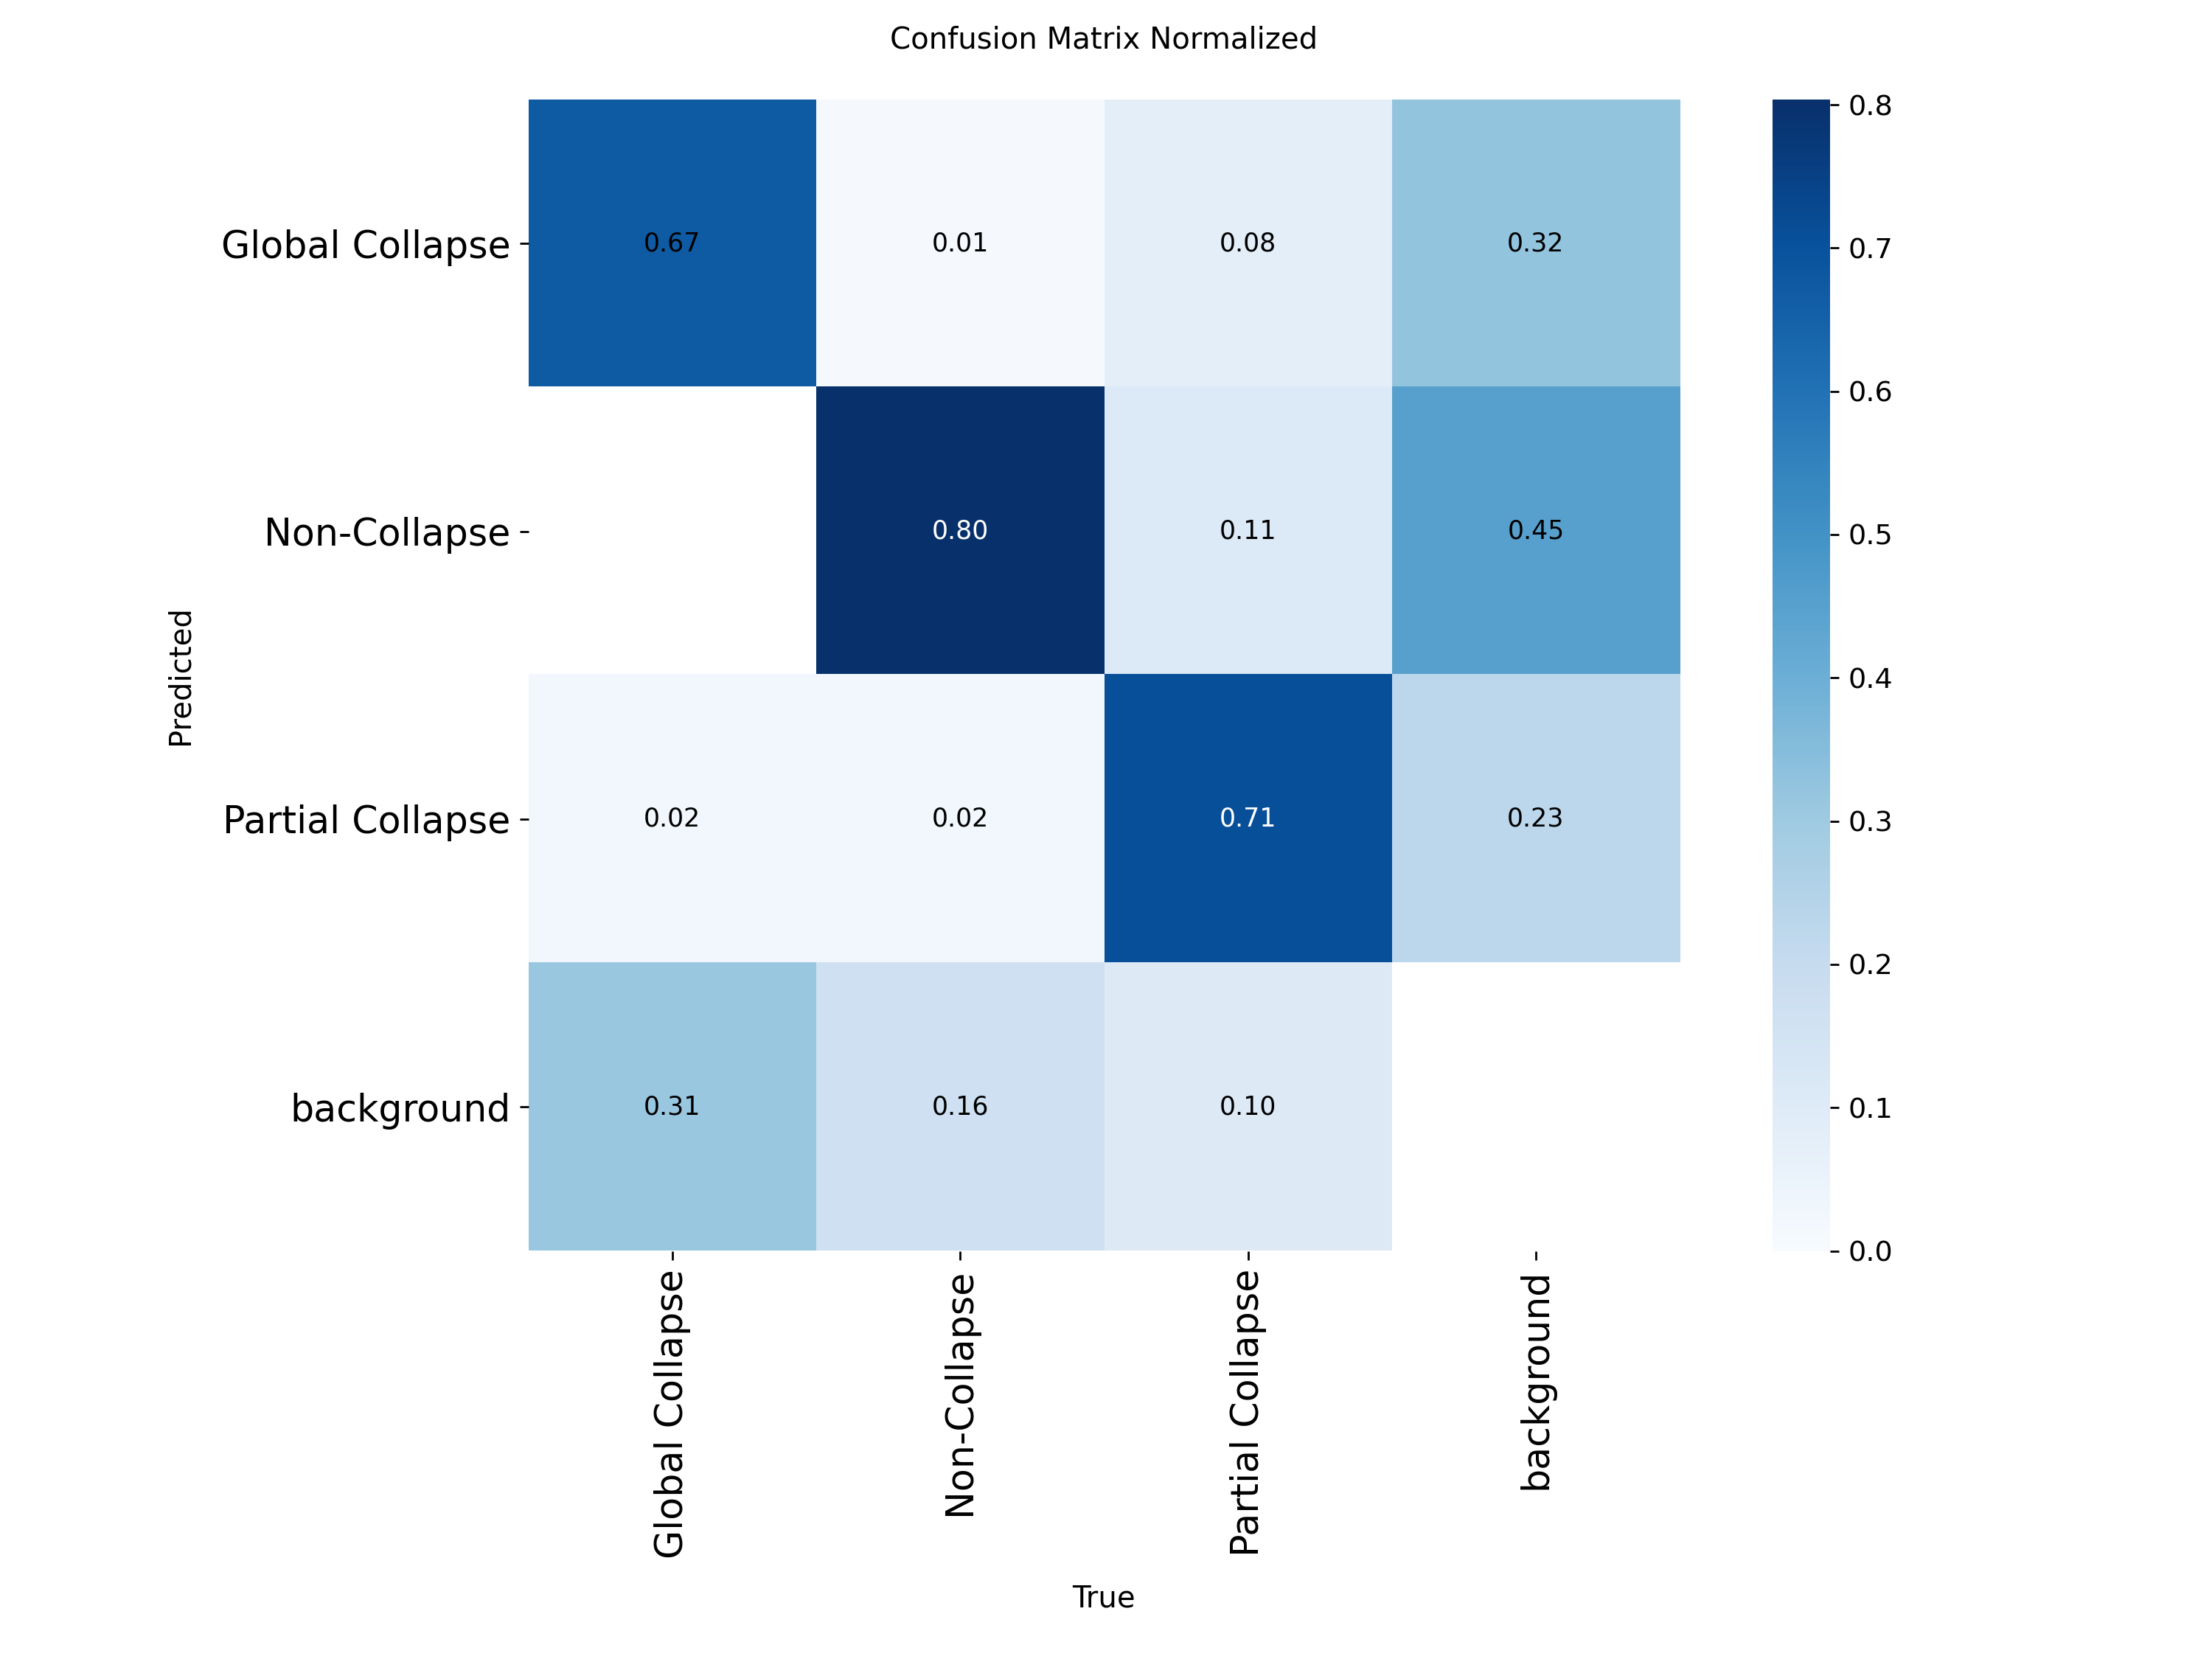

In [ ]:
Image(filename="/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

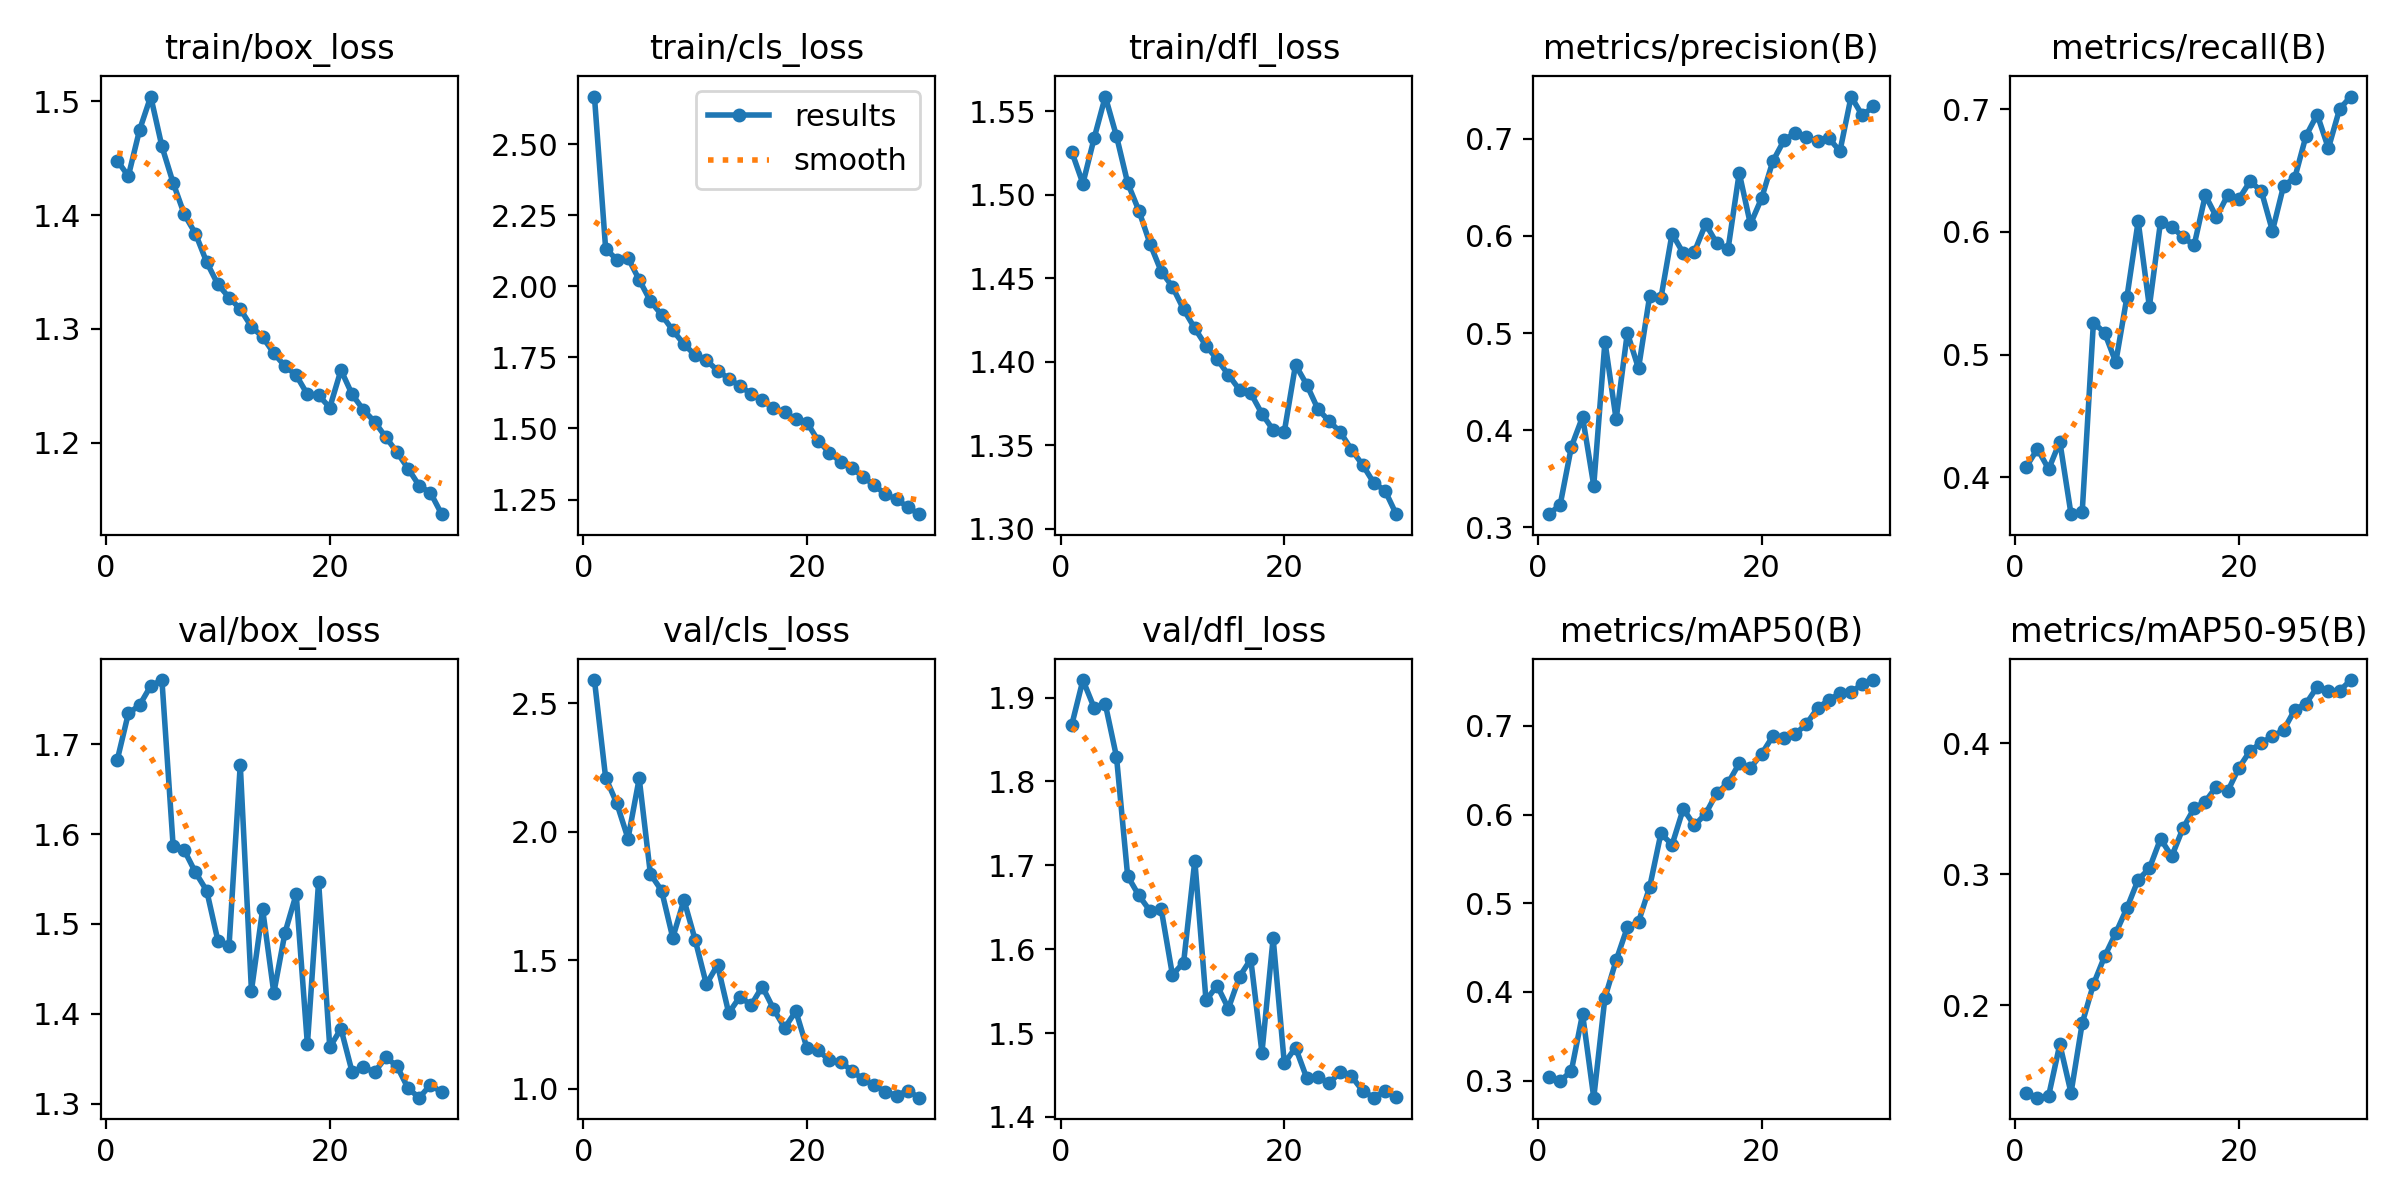

In [ ]:
Image(filename="/content/runs/detect/train/results.png", width=600)

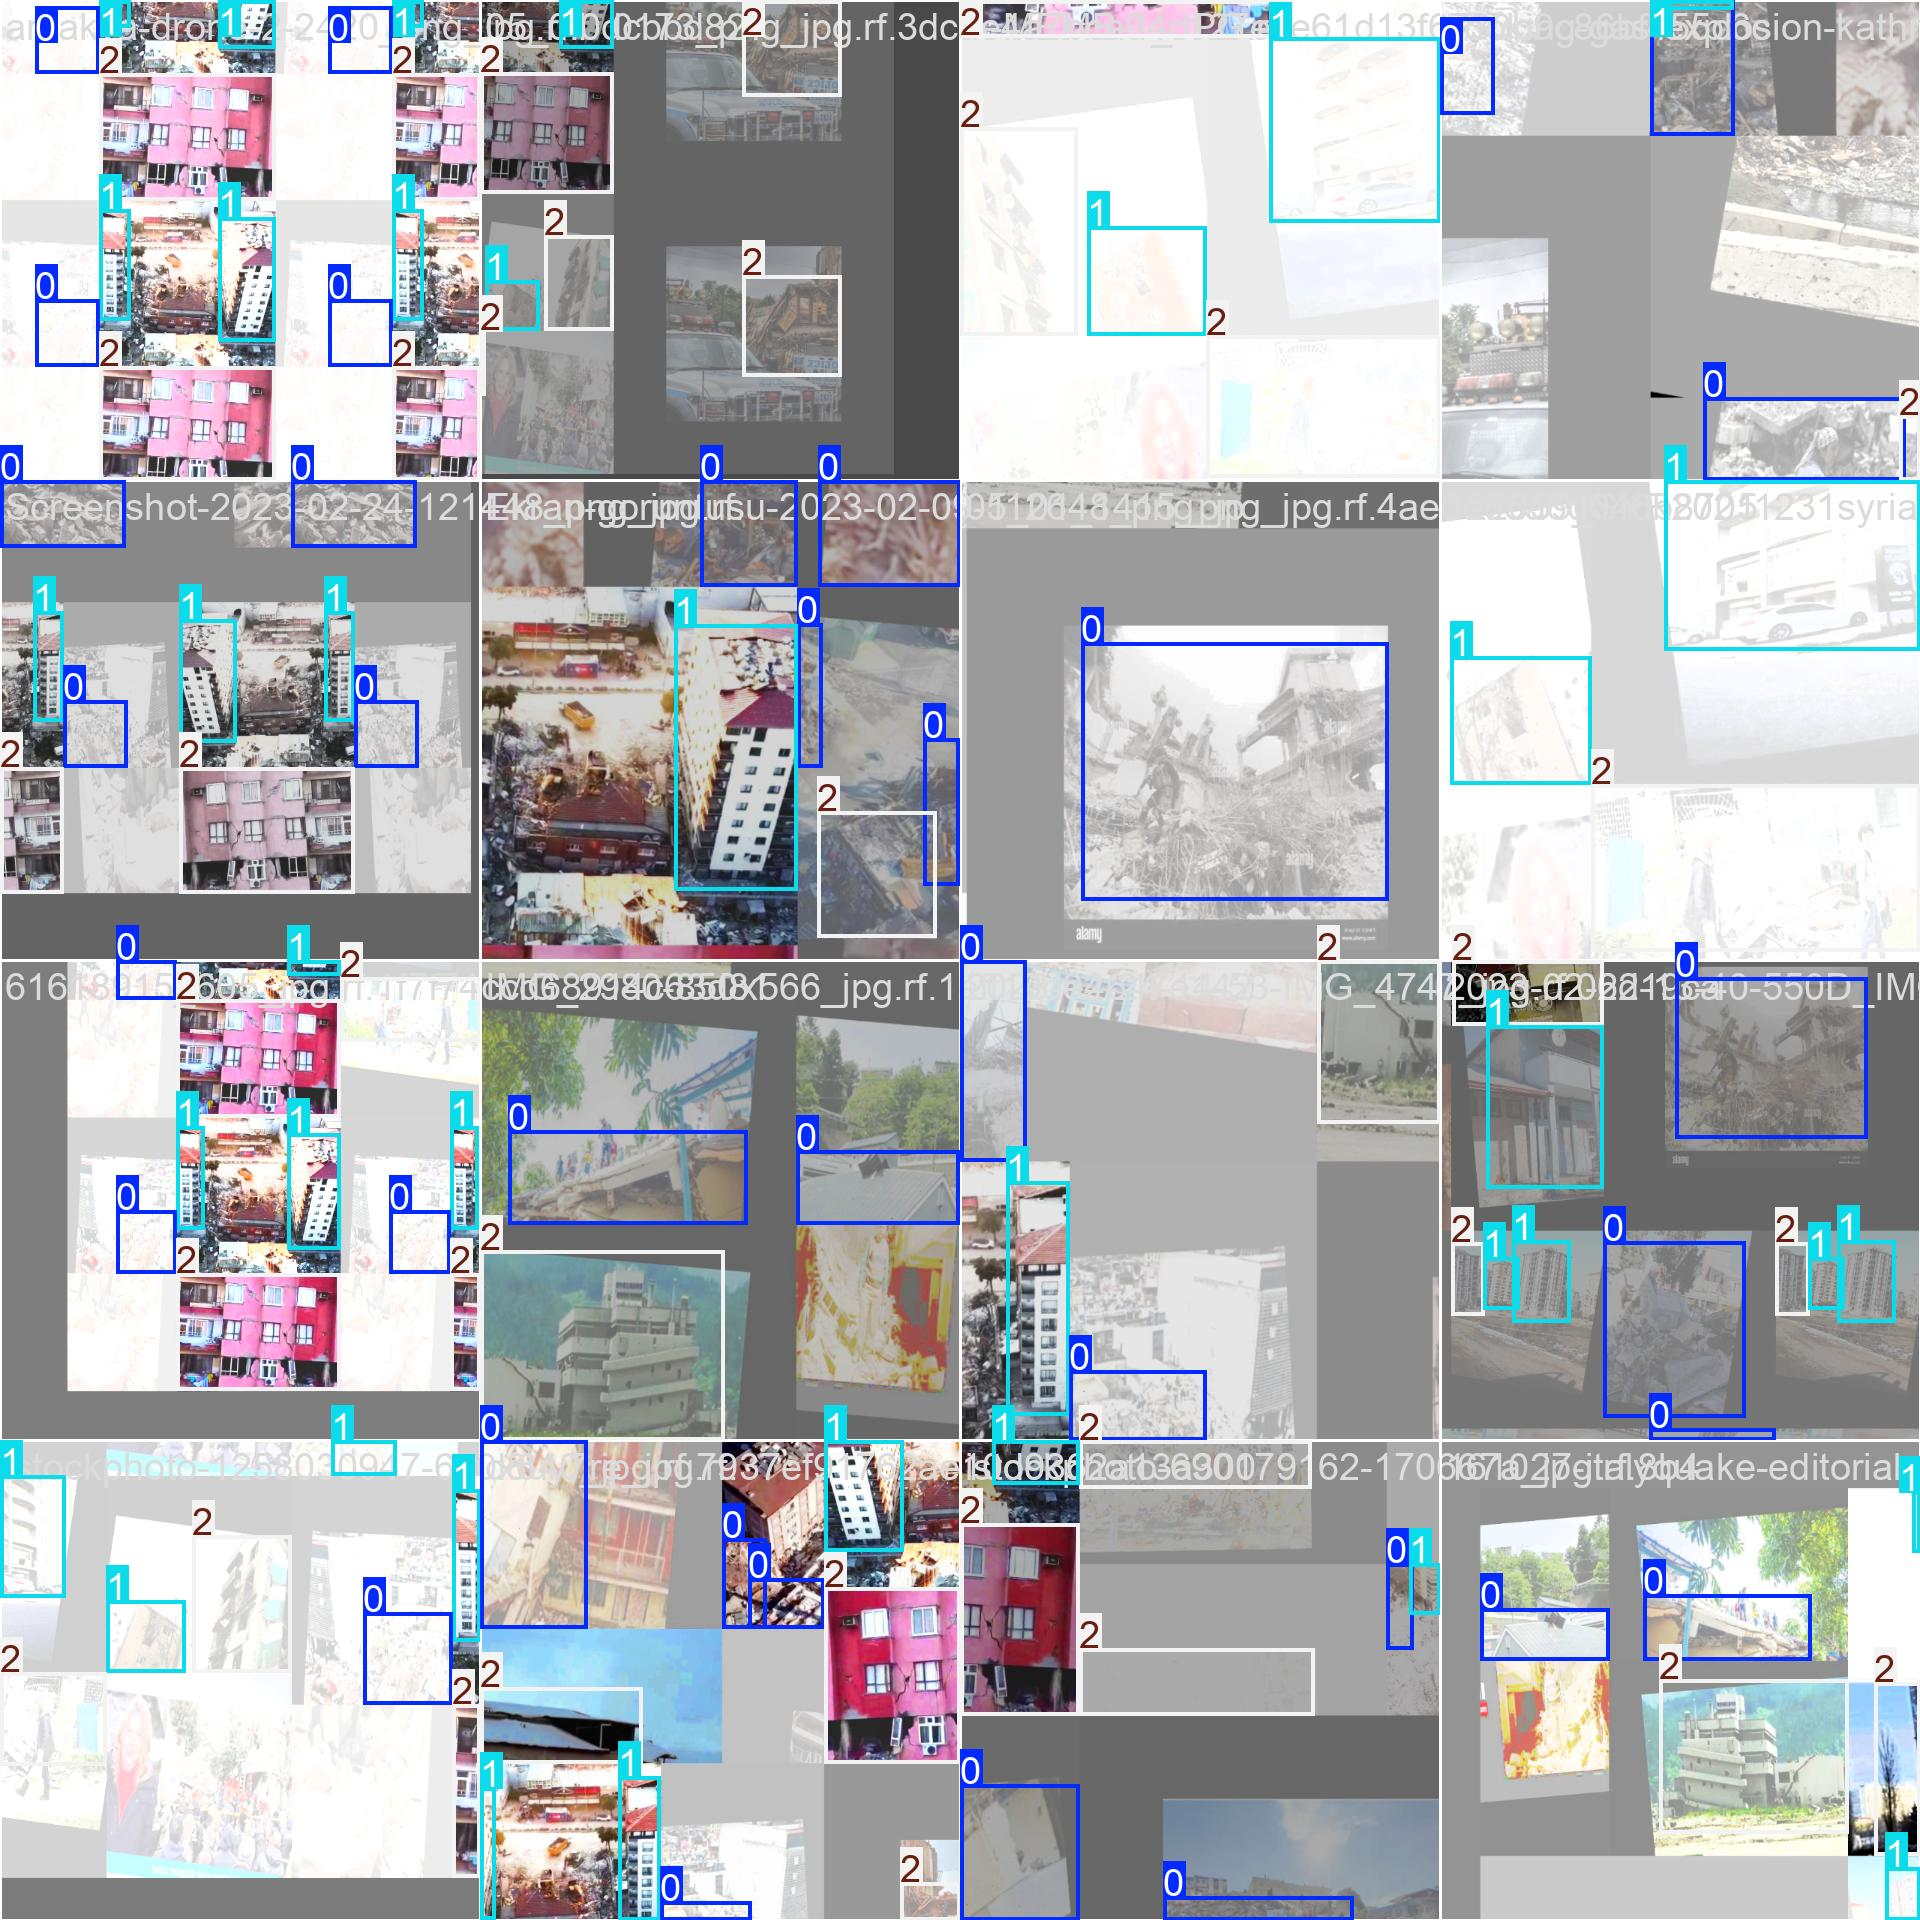

In [ ]:
Image(filename="/content/runs/detect/train/train_batch0.jpg", width=600)

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
results = model.val()

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1722.4±579.4 MB/s, size: 80.6 KB)


val: Scanning /content/dataset/valid/labels.cache... 289 images, 25 backgrounds, 0 corrupt: 100%|██████████| 289/289 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]


                   all        289        585      0.732      0.707      0.751      0.447
       Global Collapse        119        201      0.716      0.632      0.667      0.325
          Non-Collapse         98        219       0.68      0.757      0.764      0.458
      Partial Collapse        143        165      0.801      0.733      0.823       0.56
Speed: 2.7ms preprocess, 5.7ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val


In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
results = model.predict("/content/drive/MyDrive/ambruk.jpg", save=True, conf=0.5)


image 1/1 /content/drive/MyDrive/ambruk.jpg: 320x640 1 Global Collapse, 50.5ms
Speed: 1.9ms preprocess, 50.5ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict


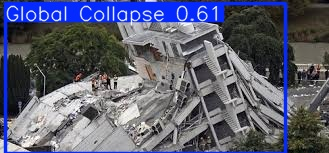

In [ ]:
Image(filename="/content/runs/detect/predict/ambruk.jpg", width=600)

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
results = model.predict("/content/drive/MyDrive/partial ambruk.jpg", save=True, conf=0.5)


image 1/1 /content/drive/MyDrive/partial ambruk.jpg: 384x640 1 Partial Collapse, 212.7ms
Speed: 4.8ms preprocess, 212.7ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2


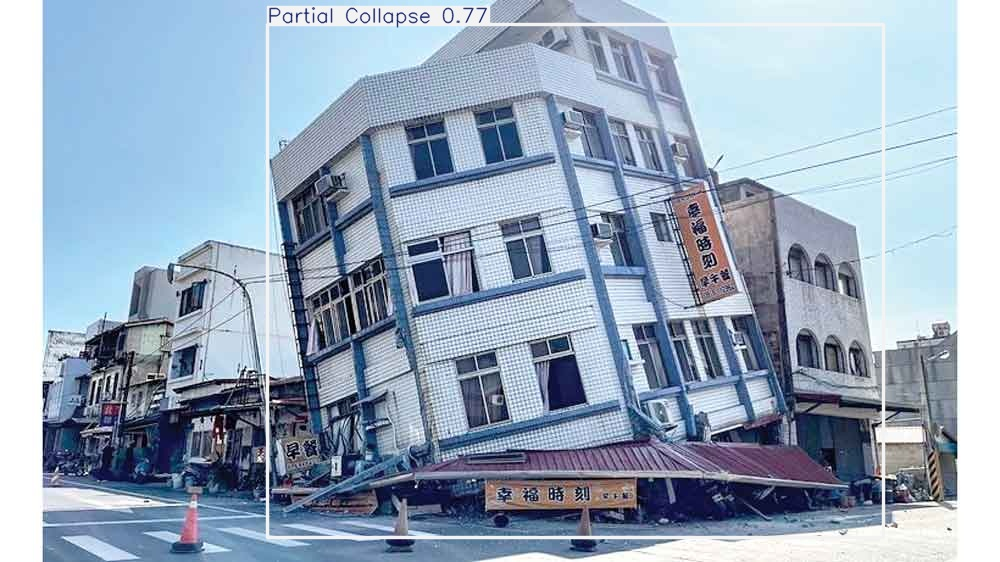

In [ ]:
Image(filename="/content/runs/detect/predict2/partial ambruk.jpg", width=600)

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
results = model.predict("/content/dataset/test/images/kahramanmaras-kesit-1200_png_jpg.rf.d8c70e19801a274485ac1a1f02a131df.jpg", save=True, conf=0.5)


image 1/1 /content/dataset/test/images/kahramanmaras-kesit-1200_png_jpg.rf.d8c70e19801a274485ac1a1f02a131df.jpg: 640x640 2 Non-Collapses, 9.9ms
Speed: 4.1ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


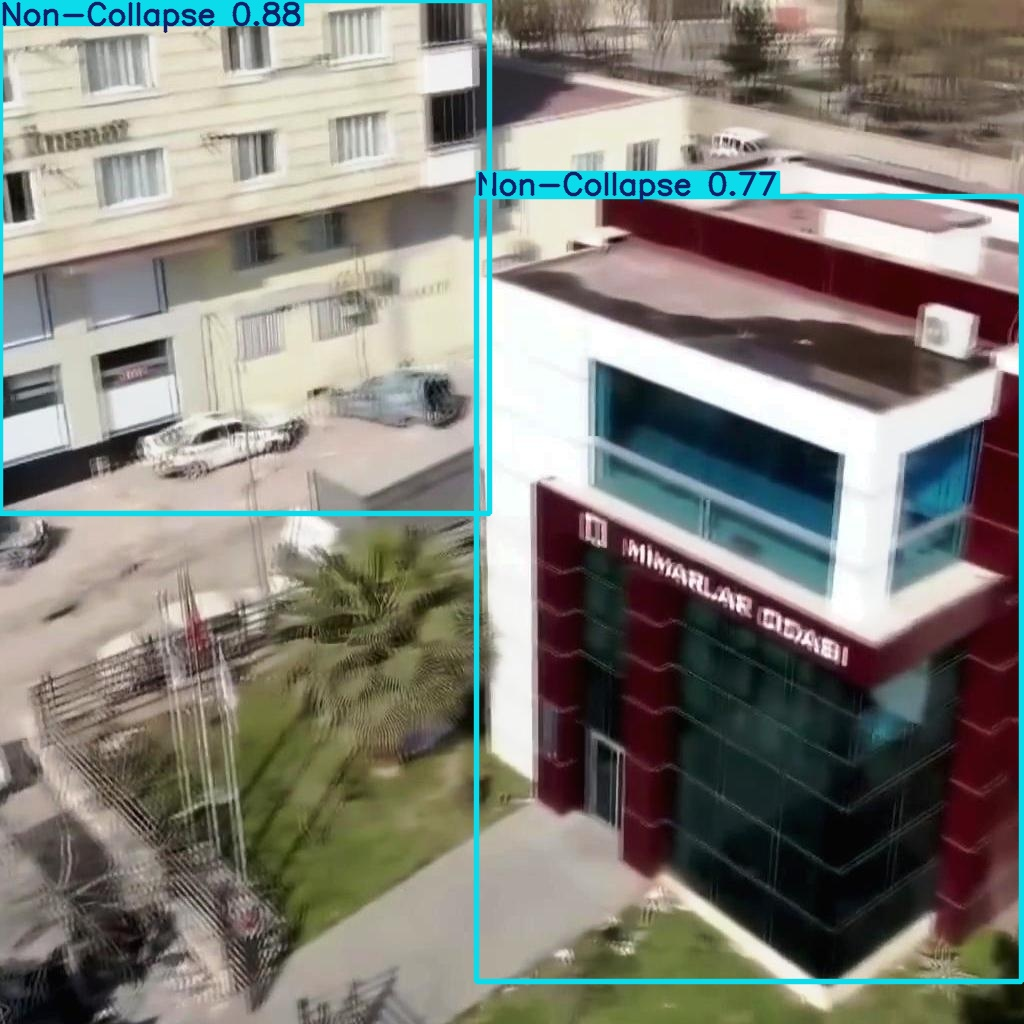

In [ ]:
Image(filename="/content/runs/detect/predict3/kahramanmaras-kesit-1200_png_jpg.rf.d8c70e19801a274485ac1a1f02a131df.jpg", width=600)

In [ ]:
# Buat folder tujuan di Google Drive jika belum ada (opsional, tapi disarankan)
!mkdir -p /content/drive/MyDrive/CollapseDetector_Hasil

In [ ]:
# Salin seluruh folder /content/runs
!cp -r /content/runs /content/drive/MyDrive/CollapseDetector_Hasil